In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import itertools as it

from scipy.special import binom
from scipy.stats import multinomial
from itertools import product
from matplotlib.pyplot import cm
from collections import defaultdict
import numpy as np
import scipy

In [2]:
def psi(p, q, b, l):
    """
    p: mass of reference set, i.e, \alpha/2-balls arount training samples. 
    q: mass of l*\beta extension around reference set
    b: batchsize
    l: belt-radius multiplicator
    """
    
    I = np.array(np.meshgrid(
        list(range(1, b+1)), 
        list(range(1, b+1)), 
        list(range(0, b+1)))).T.reshape(-1,3)

    c1 = (I.sum(axis=1) == b)
    c2 = (I[:,2]<=l-1)
    I = I[c1 & c2,:]

    probabilities = multinomial.pmf(
        I, 
        n=b, 
        p=[p, 1-q,  q-p]        
    )
    
    return sum(probabilities)

In [3]:
def basic_bound(p_A, p_B, b, l):
    r = 0
    
    def k(n):
        return max([1, b + 1 -l -n])
    
    for n_1 in range(1, b - 1 + 1):
        
        for n_2 in range(k(n_1), b-n_1+1):
            
            tmp = binom(b, n_1)*binom(b-n_1, n_2)
            tmp *= p_A**n_1
            tmp *= p_B**n_2
            tmp *= (1-p_A-p_B)**(b-n_1-n_2)
            
            r+= tmp
            
    return r

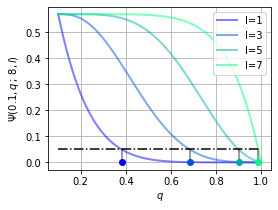

In [13]:
# def bound_adapted(a, a_ext, b, l):
#     """
#     a: mass of reference set, i.e, \alpha/2-balls arount training samples. 
#     a_ext: mass of l*\beta extension around reference set
#     b: batchsize
#     l: belt-radius multiplicator
#     """
#     return basic_bound(a, 1-a_ext, b, l)

a = 0.1
b = 8
c_b = 0.95


X = np.linspace(a, 1, 1000)
Ys = {}

plt.figure(figsize=(4,3))
colors = cm.winter(np.linspace(0,1,b-1))

for l in range(1, b):

    if l % 2 == 0:
        continue
        
    Y = np.array([psi(a, a_ext, b, l) for a_ext in X])
    Ys[l] = Y
    
    plt.plot(X, Y, alpha=0.5, color=colors[l-1], label='l={}'.format(l), linewidth=2)

plt.plot([a, 1], [1-c_b]*2, '-.', color='black')

lowerbounds = []

for l in range(1, b):
    
    if l % 2 == 0:
        continue
    
    I = (Ys[l] <= 1 - c_b)
    I = I.nonzero()[0][0]
    
    x = X[I]
    y = Ys[l][I]
    lowerbounds.append(x)
    
    
    plt.plot([x, x], [0, y], '-', color='black', alpha=0.5)
    plt.plot(x, 0, 'o', color=colors[l-1])

    
plt.grid()
plt.yscale('linear')
#plt.ylim((-0.05, 0.3))
plt.xlabel(r"$q$")
plt.ylabel(r"$\Psi(0.1,q\, ; \,8,l)$")
plt.legend()
plt.savefig('belt_concentration_1.pdf', bbox_inches='tight',pad_inches=0)

# plt.figure()
# plt.grid()

# X = list(range(1, b))
# Y = lowerbounds
# print(Y)

# plt.plot(X, Y, color='black')
# plt.fill_between(X, Y, 1, alpha=0.5, color='darkblue')
# plt.xlabel('$l$')
# plt.ylabel(r"minimal mass of $l\cdot\beta$ belt")
# plt.savefig('belt_concentration_2.pdf', bbox_inches='tight')

In [17]:
def find_smallest_possible_a_ext(a, b, l, c_b):
    """
    a: mass of reference set, i.e, \alpha/2-balls arount training samples. 
    b: batchsize
    l: belt-radius multiplicator
    c_b: mass of beta-connected b-samples
    """
    #def bound(a, a_ext, b, l):
    #    return basic_bound(a, 1-a_ext, b, l)
    
    
    X = np.linspace(a, 1, 250)
    Y = np.array([psi(a, a_ext, b, l) for a_ext in X])
    I = (Y <= 1 - c_b)
    I = I.nonzero()[0][0]
    
    x = X[I]
    
    return x


X = np.linspace(0, 1, 250)[1:-1]

Y = defaultdict(list)

for l in range(1, b):
    for x in X:
        Y[l].append(
            find_smallest_possible_a_ext(x, b, l, c_b)
        ) 

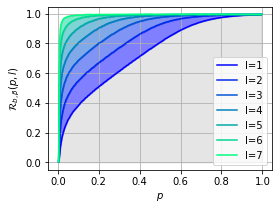

In [18]:
plt.figure(figsize=(4,3))
for l, Y_l in Y.items():
    plt.plot(X, Y_l, color=colors[l-1], label='l={}'.format(l))
    
for l in range(1, b-1):
    plt.fill_between(X, Y[l], Y[l+1], color=colors[l-1], alpha=0.5)
    
# plt.fill_between(X, Y[b-1], 1, color=colors[b-2], alpha=0.5 )
plt.fill_between(X, 0, Y[1], color='gray', alpha=0.2)

plt.legend()
plt.grid()
plt.ylabel(r"$\mathcal{R}_{b,\beta}(p,l)$")
plt.xlabel(r"$p$")
plt.savefig('belt_concentration_3.pdf', bbox_inches='tight', pad_inches=0)

In [3]:
def sum_bound(p, q, b, l, k):
    """
    p: mass of reference set, i.e, \alpha/2-balls arount training samples. 
    q: mass of l*\beta extension around reference set
    b: batchsize
    l: belt-radius multiplicator
    """



    I = [(i, k, b-k-i) for i in range(1, b-k+1) if b-k-i <=l-1]    
    I = np.array(I)
    print(I)
    
    probabilities = multinomial.pmf(
        I, 
        n=b, 
        p=[p, 1-q,  q-p]        
    )
    
    return sum(probabilities)

In [42]:
def sanity(p, q, b, l):
    """
    p: mass of reference set, i.e, \alpha/2-balls arount training samples. 
    q: mass of l*\beta extension around reference set
    b: batchsize
    l: belt-radius multiplicator
    """
    
    I = np.array(np.meshgrid(
        list(range(1, b+1)), 
        list(range(1, b+1)), 
        list(range(0, b+1)))).T.reshape(-1,3)

    c1 = (I.sum(axis=1) == b)
    c2 = (I[:,2]<=l-1)
    I = I[c1 & c2,:]

    probabilities = multinomial.pmf(
        I, 
        n=b, 
        p=[p, 1-q,  q-p]        
    )
    
    return sum(probabilities)

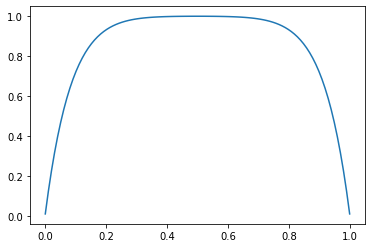

In [44]:
s = np.linspace(1e-3,0.999,100)
plt.plot(s,[sanity(a,a,12,5) for a in s])

True


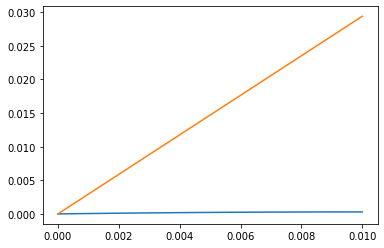

In [7]:
q = 0.01
l = 2
b = 3


X = np.linspace(0, q, 100)
plt.figure()

res = []
for k in range(1, b):
    Y = np.array([sum_bound(p, q, b, l, k) for p in X])
    
    res.append(all(Y[:-1]-Y[1:]<0))
    plt.plot(X, Y)
print(all(res))